# How many clusters?

You are given an array `points`, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

In [1]:
import pandas as pd
fish = pd.read_csv("dataset/fish.csv", header=None)
points = fish.iloc[:,[2,6]]
print(points.columns)
points.head()

Int64Index([2, 6], dtype='int64')


,2,6
0,23.2,13.4
1,24.0,13.8
2,23.9,15.1
3,26.3,13.3
4,26.5,15.1


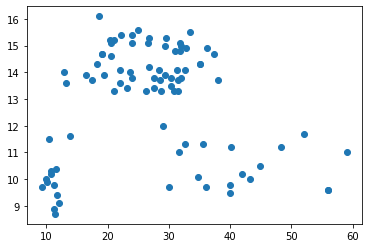

In [2]:
import matplotlib.pyplot as plt
plt.scatter(points.iloc[:,0],points.iloc[:,1])
plt.show()

# Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

In [3]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(points)

# Print cluster labels of new_points
print(labels)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0]


# Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

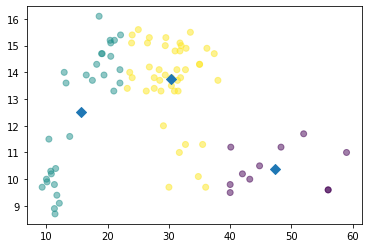

In [4]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = points.iloc[:,0]
ys = points.iloc[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c = labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = 'D', s=50)
plt.show()


# How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

In [5]:
samples = pd.read_csv("dataset/seeds.csv", header=None)
samples.columns = ["A", "B", "C", "D", "E", "F","G", "H"]
samples.head()

,A,B,C,D,E,F,G,H
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
# ks = range(1, 6)
# inertias = []

# for k in ks:
#     # Create a KMeans instance with k clusters: model
#     model = KMeans(n_clusters = k)
    
#     # Fit model to samples
#     model.fit(samples.drop("H",axis = 1))
    
#     # Append the inertia to the list of inertias
#     inertias.append(model.inertia_)
    
# # Plot ks vs inertias
# plt.plot(ks, inertias, '-o')
# plt.xlabel('number of clusters, k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# plt.show()


# Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [7]:
# # Create a KMeans model with 3 clusters: model
# model = KMeans(n_clusters = 3)

# # Use fit_predict to fit model and obtain cluster labels: labels
# labels = model.fit_predict(samples)

# # Create a DataFrame with labels and varieties as columns: df
# df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# # Create crosstab: ct
# ct = pd.crosstab(df['labels'] , df['varieties'])

# # Display ct
# print(ct)


# Scaling fish data for clustering

You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

In [8]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


# Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [9]:
samples = pd.read_csv("dataset/fish.csv", header=None)
samples.columns=["species","A","B","C","D","E","F"]
samples.head()

,species,A,B,C,D,E,F
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [10]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples.drop("species",axis=1))

# Calculate the cluster labels: labels
labels = pipeline.predict(samples.drop("species",axis=1))

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels , 'species':samples['species']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'] , df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1            0    17      0      0
2           33     0      1      0
3            0     0      0     13


# Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales each sample - here, each company's stock price - independently of the other.

In [11]:
movements = pd.read_csv("dataset/company-stock-movements-2010-2015-incl.csv")
movements.head()
# movements.plot()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [12]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements.iloc[:,1:])


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

# Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

In [13]:
companies = movements.iloc[:,0]
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements.iloc[:,1:])

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
8        0                         Caterpillar
42       0                   Royal Dutch Shell
13       0                   DuPont de Nemours
12       0                             Chevron
10       0                      ConocoPhillips
32       0                                  3M
44       0                        Schlumberger
53       0                       Valero Energy
57       0                               Exxon
35       0                            Navistar
9        1                   Colgate-Palmolive
27       1                      Kimberly-Clark
40       1                      Procter Gamble
54       2                            Walgreen
21       2                               Honda
30       2                          MasterCard
20       2                          Home Depot
59       2                               Yahoo
34       2                          Mitsubishi
45       2                                Sony
7        2   